# Image Classification

## Data Preparation

### 1. Download and extract the dataset sample

#### Dataset used for this project: https://www.kaggle.com/datasets/iluvchicken/cheetah-jaguar-and-tiger/versions/1 (You can use your own dataset; do not forget to change the file path of the dataset)

### 2. Create two folders called 'images' and 'train-test'

In [1]:
import os

# dataset directory and extension
parent_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\\"
subdirs = ['images', 'train-test']

for subdir in subdirs:
    newdir = parent_dir + subdir
    
    # create folders
    try:
        os.makedirs(newdir)
        print('Folder ' + subdir + ' created!')
        
    # print message where folders already exist
    except FileExistsError:
        pass
        print('Folder ' + subdir + ' already exist!')

Folder images created!
Folder train-test created!


### 3. Copy the downloaded dataset to the 'images' folder

In [2]:
import os
import shutil

# downloaded dataset directory
parent_dir = r"C:\Users\admir\Downloads\archive\\"

# checking through all images
for folder in os.listdir(parent_dir):
    # dataset source
    folder_path = os.path.join(parent_dir, folder)
    
    # destination
    destination = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\images\\" + folder
    
    # copy from source to destination
    try:
        shutil.copytree(folder_path, destination)
        
    # print message where folders already exist
    except FileExistsError:
        shutil.rmtree(destination)
        shutil.copytree(folder_path, destination)

### 4. Check the dataset

#### Since datasets from Kaggle are usually set up properly, there is no need to check the dataset. If you downloaded your own dataset from other websites which are not set up properly (e.g. includes other image extensions), you need to check your dataset first.

In [3]:
import os
import cv2
import imghdr

# image directory and image extension
image_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\images\\"
image_ext = ['jpeg', 'jpg', 'png']

## Remove images
print("Removed images: ")

# checking through all folders
for folder in os.listdir(image_dir):
    remove_count = 0
    
    # checking through all images
    for image in os.listdir(os.path.join(image_dir, folder)):
        image_path = os.path.join(image_dir, folder, image)
        
        # read through image extensions
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            # remove image if not included as part of the image extension
            if tip not in image_ext:
                os.remove(image_path)
                remove_count += 1
                                
        except Exception as e:
            print('Issue with image {}'.format(image_path))
      
    # print the number of removed images for each class
    print(folder + ": " + str(remove_count))

Removed images: 
cheetah: 34
jaguar: 36
tiger: 41


### 5. Rename files

In [4]:
import os
import cv2
from PIL import Image

# image directory
image_dir = r'C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\images\\'

print("Current total images: ")

# checking through all folder
for folder in os.listdir(image_dir):
    image_count = 0
    
    # checking though all images
    for image in os.listdir(os.path.join(image_dir, folder)):
        # image source
        image_path = os.path.join(image_dir, folder, image)
        image_count += 1
        
        # new image name
        filename = folder + str(image_count) + ".jpg"      
        
        # rename images
        source = image_path
        destination = image_dir + folder + "/" + filename
        os.rename(source, destination)
        
    # print current total images for each class
    print(folder + ": " + str(image_count))

Current total images: 
cheetah: 966
jaguar: 964
tiger: 959


### 6. Create two folders called 'train' and 'test'

In [5]:
import os

# parent directory and extension
parent_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\train-test\\"
subdirs = ['train', 'test']

for subdir in subdirs:
    newdir = parent_dir + subdir
    
    # create train and test folders
    try:
        os.makedirs(newdir)
        print('Folder ' + subdir + ' created!')
      
    # print message if folders already exist
    except FileExistsError:
        pass
        print('Folder ' + subdir + ' already exists!')

Folder train created!
Folder test created!


### 7. Create label folders inside the 'train' and 'test' folders

In [6]:
import os
import shutil
from random import seed
from random import random

# parent directory
parent_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\\"

# label and subdirectory lists
labels = []
subdirs = []

# append the list of labels
for folder in os.listdir(parent_dir + 'images'):
    labels.append(folder)

# create the label folders inside the 'train' and 'test' folders
for folder in os.listdir(parent_dir + 'train-test'):
    subdirs.append(folder)
    
    for subdir in subdirs:
        for label in labels:
            os.makedirs(os.path.join(parent_dir + 'train-test/' + subdir + '/' + label), exist_ok = True)

### 8. Copy 80% of the images to the folders inside the 'train' folder and 20% of the images to the folders inside the 'test' folder randomly

In [7]:
import os
import shutil
from random import seed
from random import random

# parent directory and subdirectory list
parent_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\\"
subdirs = ['train/', 'test/']

# random and value ratio
seed(1)
val_ratio = 0.2

for folder in os.listdir(parent_dir + 'images'):
    for image in os.listdir(os.path.join(parent_dir + 'images/', folder)):
        # image source
        image_path = os.path.join(parent_dir + 'images/', folder, image)
        
        # destination = subdir[0] ('train' folder)
        destination = parent_dir + 'train-test/' + subdirs[0] + '/' + folder + '/' + image

        # random less than the val_ratio
        if random() < val_ratio:
            # destination = subdir[1] ('test' folder)
            destination = parent_dir + 'train-test/' + subdirs[1] + '/' + folder + '/' + image

        # copy images from source to destination
        shutil.copy(image_path, destination)

## Training Model

Found 2319 images belonging to 3 classes.
Found 570 images belonging to 3 classes.
Epoch 1/10
73/73 [==============================] - 185s 3s/step - loss: 4.4282 - accuracy: 0.9314 - val_loss: 0.0947 - val_accuracy: 0.9667
Epoch 2/10
73/73 [==============================] - 190s 3s/step - loss: 0.0500 - accuracy: 0.9914 - val_loss: 0.1344 - val_accuracy: 0.9789
Epoch 3/10
73/73 [==============================] - 193s 3s/step - loss: 0.0366 - accuracy: 0.9931 - val_loss: 0.1818 - val_accuracy: 0.9807
Epoch 4/10
73/73 [==============================] - 187s 3s/step - loss: 0.0157 - accuracy: 0.9966 - val_loss: 0.1168 - val_accuracy: 0.9877
Epoch 5/10
73/73 [==============================] - 185s 3s/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 0.0937 - val_accuracy: 0.9877
Epoch 6/10
73/73 [==============================] - 189s 3s/step - loss: 3.3143e-04 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9842
Epoch 7/10
73/73 [==============================] - 187s 3s/step - 

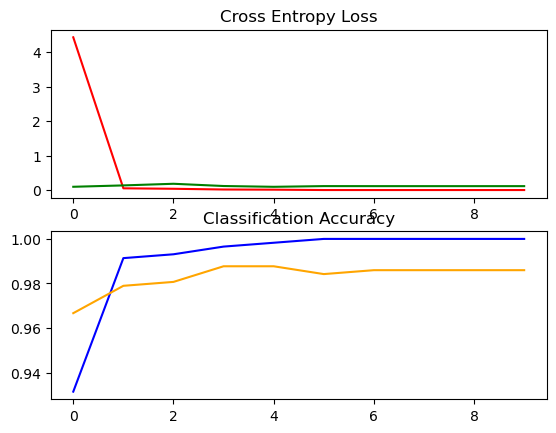

In [9]:
# VGG16 Model for Multiclass Image Classification
import os
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# calculate folder
def calculate_folder():
    parent_dir = r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\train-test\test\\"
    folder_count = 0
    
    for folder in os.listdir(parent_dir):
        folder_count += 1
    
    return folder_count

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top = False, input_shape = (224, 224, 3))
    
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
        
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
    
    # softmax are usually used for multiclass classification
    output = Dense(calculate_folder(), activation = 'softmax')(class1)
    
    # define new model
    model = Model(inputs = model.inputs, outputs = output)
    
    # compile model
    opt = SGD(learning_rate = 0.001, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

# plot diagnostic learning curves
def summarise_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color = 'red', label = 'train')
    pyplot.plot(history.history['val_loss'], color = 'green', label = 'test')
    
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color = 'blue', label = 'train')
    pyplot.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
    
# run the test harness for evaluating a model
def run_test():
    # define model
    model = define_model()
    
    # create data generator
    datagen = ImageDataGenerator(featurewise_center = True)
    
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.799, 103.939]
    
    # prepare iterator
    train = datagen.flow_from_directory(r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\train-test\train\\",
                                       class_mode = 'categorical', batch_size = 32, target_size = (224, 224))
    test = datagen.flow_from_directory(r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\dataset\train-test\test\\",
                                      class_mode = 'categorical', batch_size = 32, target_size = (224, 224))
    
    # fit model
    history = model.fit(train, steps_per_epoch = len(train), validation_data = test,
                       validation_steps = len(test), epochs = 10, verbose = 1)
    
    # evaluate model and print accuracy
    _, acc = model.evaluate(test, steps = len(test), verbose = 0)
    print('> %.2f' % (acc * 100.0))
    
    # learning curves
    summarise_diagnostics(history)
    
    # save model
    model.save(r"C:\Users\admir\UK\United Kingdom\Personal Projects\Image Classification\image-classification\training_model.h5")
    
# run the test harness
run_test()   